In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import pybaselines
import numpy as np

In [82]:
plt.rcParams["figure.figsize"] = [5.0, 5.0]
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 10 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 10 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 10 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.grid'] = False # make grid

In [111]:
data_file = 'file'

data = pd.read_csv(data_file, header=0, index_col=0)


list = []
length = len(data.columns)
for i in range(length):
    list.append(str(i))
data = data.set_axis(list, axis='columns')

data

,0,1,2,3,4,5,6,7
wavenumber,,,,,,,,
500.4372,0.201739,0.173865,0.125326,0.105356,0.085352,0.066389,0.041435,-0.000797
501.4014,0.203112,0.174042,0.126174,0.106175,0.085934,0.066909,0.042021,-0.000725
502.3656,0.203921,0.174229,0.126834,0.106651,0.086478,0.067101,0.042684,-0.000518
503.3299,0.204142,0.174514,0.127212,0.106845,0.086953,0.066979,0.043229,-0.000249
504.2941,0.203891,0.174953,0.127327,0.106875,0.087309,0.066669,0.043514,-0.000023
...,...,...,...,...,...,...,...,...
3996.7478,0.002465,0.003322,0.002674,0.001162,0.000448,0.002126,0.000660,0.001523
3997.7119,0.002834,0.004043,0.003536,0.001986,0.000898,0.002818,0.001545,0.002543
3998.6763,0.003114,0.004638,0.004064,0.002608,0.001279,0.003402,0.002242,0.003429


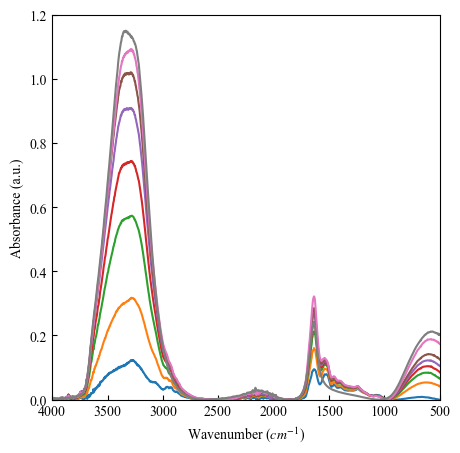

In [121]:
z = data.values.T
y = data.columns.astype(float)
x = data.index.astype(float)

for i in range(length):
    plt.plot(x, z.T[:, i])
plt.xlim(4000, 500)
plt.ylim(0, 1.2)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorbance (a.u.)')

plt.show()

In [113]:
# 空のデータフレームの作成
cols = data.columns
index = data.index
pickup_correction_data = pd.DataFrame(index=index, columns=cols)

In [114]:
# ピークトップの波数を求める
OD_data =data[2000:2800]
k = data.index.get_loc(OD_data.iloc[:,0].idxmax())

In [115]:
data = data.sort_values(OD_data.iloc[:,0].idxmax(), ascending=True, axis=1)

In [116]:
j = 0
for i in range(length):
    if i == 0:
        pickup_correction_data.iloc[:, i] = data.iloc[:, i].values
    elif data.iloc[k, i] - data.iloc[k, i-1-j]> 0.0002:
        pickup_correction_data.iloc[:, i] = data.iloc[:, i].values
        j = 0
    else :
        j+=1
pickup_correction_data = pickup_correction_data.dropna(axis=1)
pickup_correction_data = pickup_correction_data.sort_values(OD_data.iloc[:,0].idxmax(), ascending=False, axis=1)
pickup_correction_data.to_csv("file")

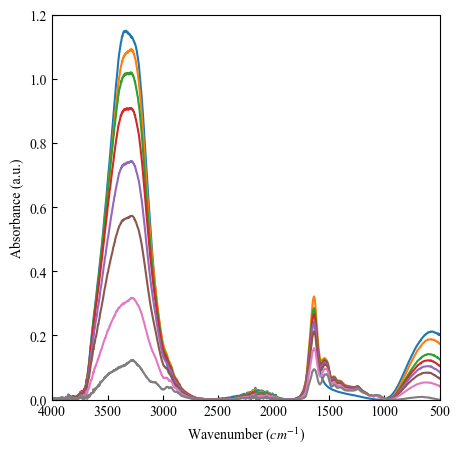

In [122]:
length = len(pickup_correction_data.T)
list_pickup = []
for i in range(length):
    list_pickup.append(str(i))
data_pickup = pickup_correction_data.set_axis(list_pickup, axis='columns')

z = data_pickup.values.T
y = data_pickup.columns.astype(float)
x = data_pickup.index.astype(float)

for i in range(length):
    plt.plot(x, z.T[:, i])
plt.xlim(4000, 500)
plt.ylim(0, 1.2)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorbance (a.u.)')

plt.show()